Amazon SageMaker is a fully managed service that provides every developer and data scientist with the ability to build, train, and deploy machine learning (ML) models quickly.

In this project, I create machine learning models automatically without writing a line of code! I use Amazon SageMaker Autopilot, an AutoML capability that automatically creates the best classification and regression machine learning models, while allowing full control and visibility.

In this project, I illustrate how to:

1. Create an AWS Account

2. Set up Amazon SageMaker Studio to access Amazon SageMaker Autopilot

3. Download a public dataset using Amazon SageMaker Studio

4. Create a training experiment with Amazon SageMaker Autopilot

5. Explore the different stages of the training experiment

6. Identify and deploy the best performing model from the training experiment

7. Predict with the deployed model

For this project, I assume the role of a developer working at a bank. I have been asked to develop a machine learning model to predict whether a customer will enroll for a certificate of deposit (CD). The model will be trained on the marketing dataset that contains information on customer demographics, responses to marketing events, and external factors.

The data has already been labeled  and a column in the dataset identifies whether the customer is enrolled for a product offered by the bank. A version of this dataset is publicly available from the ML repository curated by the University of California, Irvine.
[https://archive.ics.uci.edu/dataset/222/bank+marketing]

## **Step 1. Create an AWS Account**

The cost of this workshop is less than $10. [ https://portal.aws.amazon.com/billing/signup?nc2=h_ct&src=header_signup&redirect_url=https%3A%2F%2Faws.amazon.com%2Fregistration-confirmation#/start/email ]

## **Step 2. Set up Amazon SageMaker Studio**

Complete the following steps to onboard Amazon SageMaker Studio for access to Amazon SageMaker Autopilot.

a. Sign in to the Amazon SageMaker console.

Note: In the top right corner, make sure to select an AWS Region where Amazon SageMaker Studio is available.


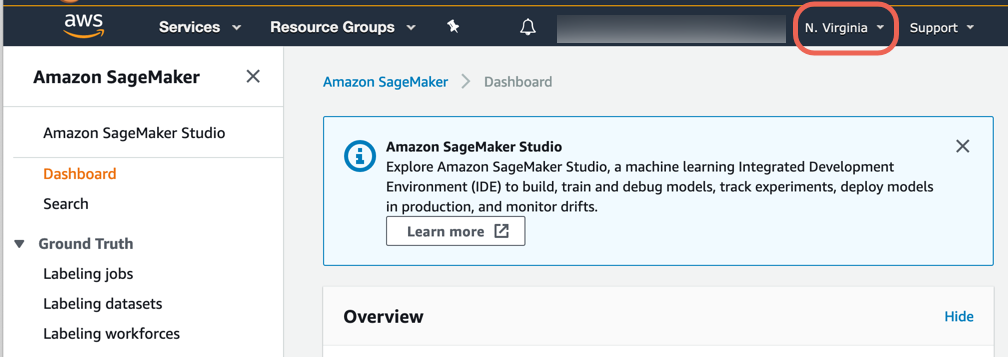

b. In the Amazon SageMaker navigation pane, choose Amazon SageMaker Studio.

Note: If you are using Amazon SageMaker Studio for the first time, you must complete the Studio onboarding process. When onboarding, you can choose to use either AWS Single Sign-On (AWS SSO) or AWS Identity and Access Management (IAM) for authentication methods. When you use IAM authentication, you can choose either the Quick start or the Standard setup procedure.

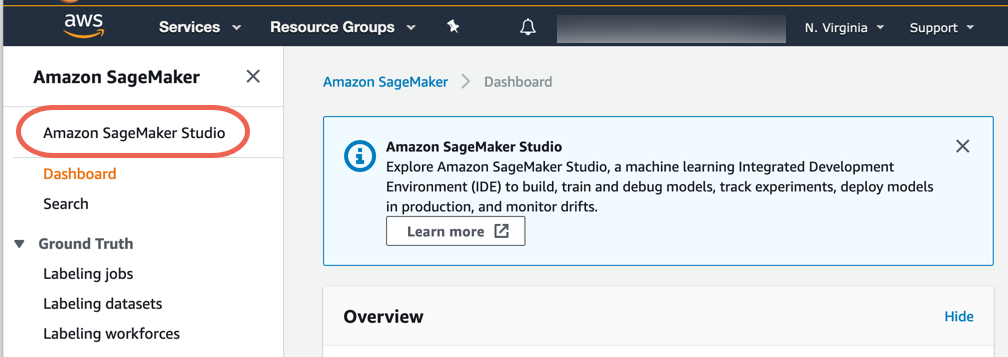

c. In the Get started box, I choose Quick start and specify a user name.

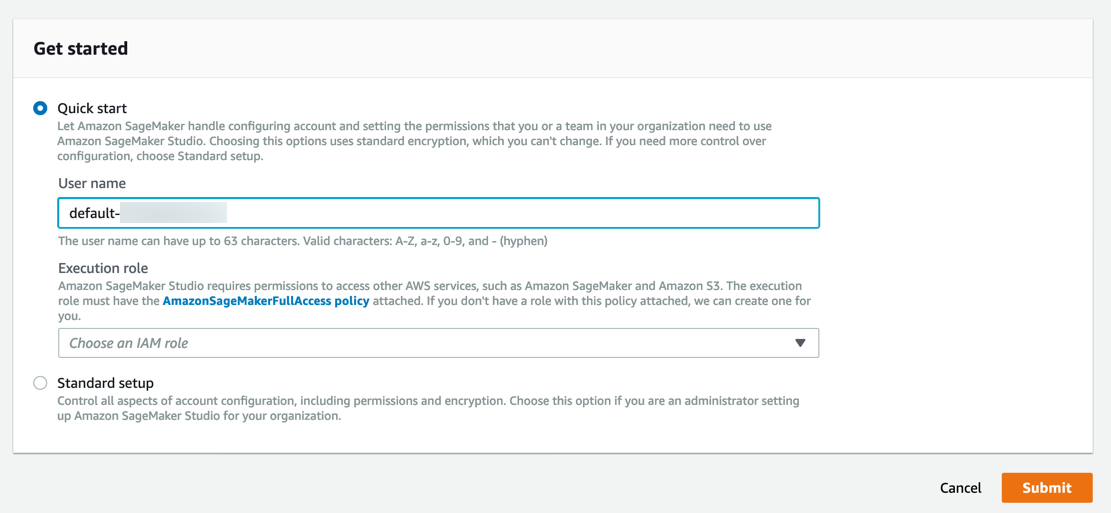

d. For Execution role, choose Create an IAM role. In the dialog box that appears, choose Any S3 bucket and choose Create role.
Amazon SageMaker creates a role with the required permissions and assigns it to your instance.

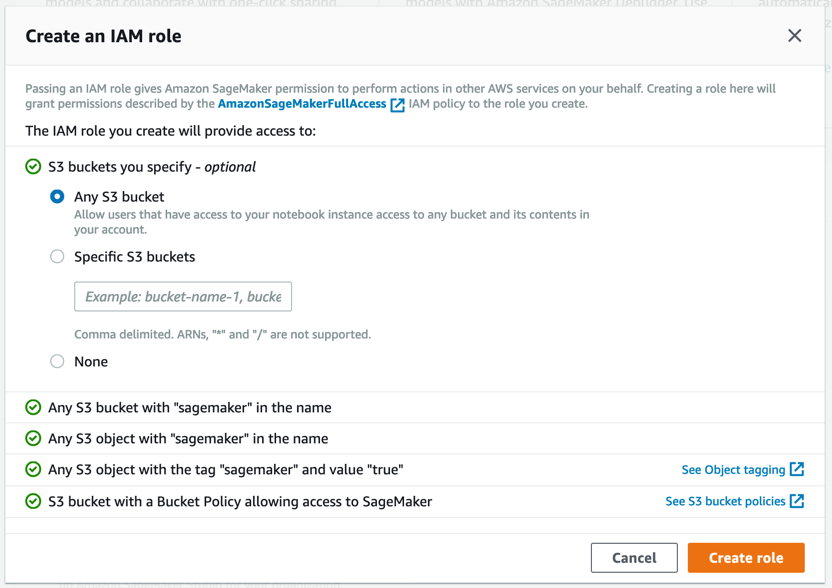

e. Click Submit.

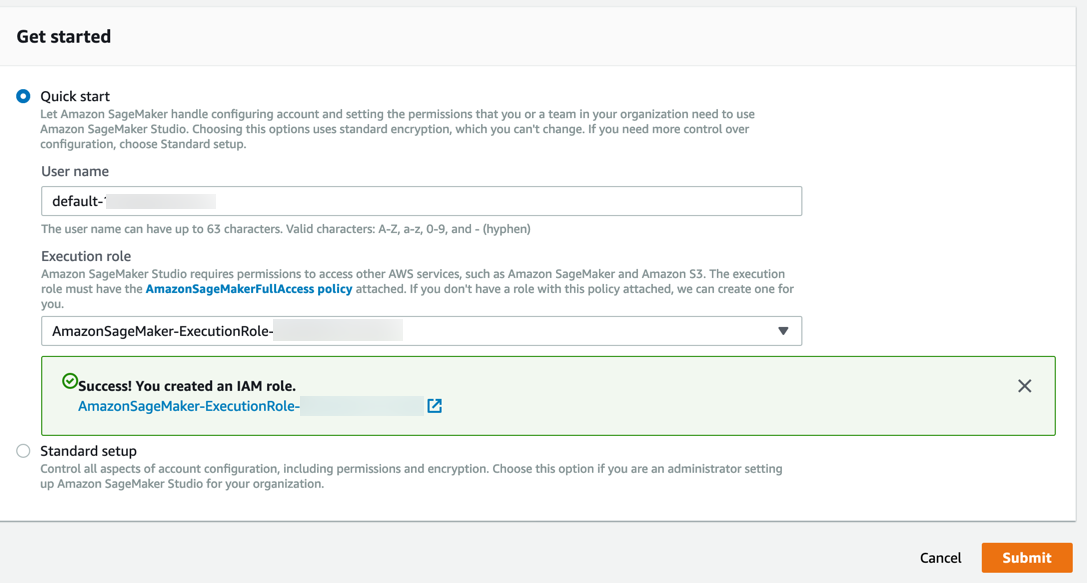

# **Step 3. Download the dataset**

a. In the Amazon SageMaker Studio Control Panel, choose Open Studio.

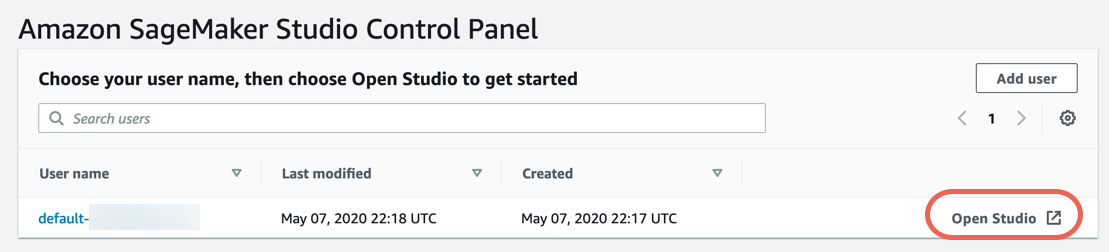

b. In JupyterLab, on the File menu, choose New, then Notebook. In the Select Kernel box, choose Python 3 (Data Science).
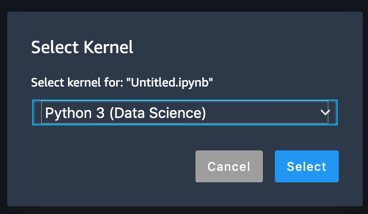


c. To download and extract the code, run the following code:

Note: While the code runs, an * appears between the square brackets. After a few seconds, the code execution completes and the * is replaced with a number.

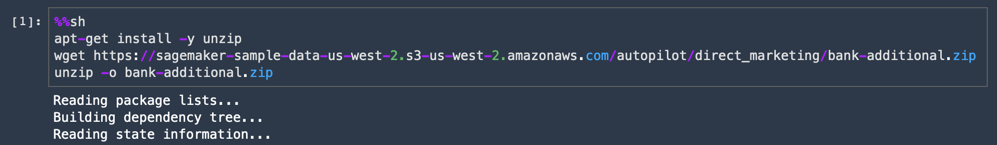

In [ ]:
%%sh
apt-get install -y unzip
wget https://sagemaker-sample-data-us-west-2.s3-us-west-2.amazonaws.com/autopilot/direct_marketing/bank-additional.zip
unzip -o bank-additional.zip

d. Run the following code:

The CSV dataset loads and displays the first ten lines.
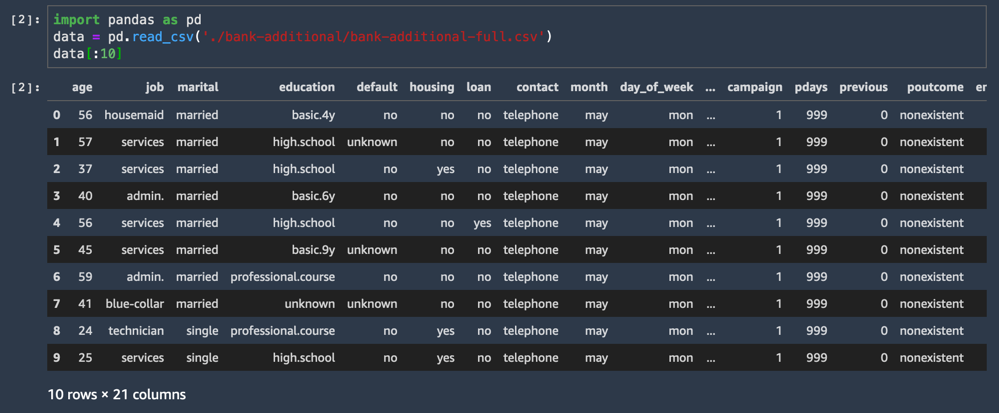

In [ ]:
import pandas as pd
data = pd.read_csv('./bank-additional/bank-additional-full.csv')
data[:10]

One of the dataset columns is named y, and represents the label for each sample: did this customer accept the offer or not?

This step is where data scientists would start exploring the data, creating new features, and so on. With Amazon SageMaker Autopilot, you don’t need to do any of these extra steps. You simply upload tabular data in a file with comma-separated values (for example, from a spreadsheet or database), choose the target column to predict, and Autopilot builds a predictive model for you.

d. Run the following code:

This step uploads the CSV dataset into an Amazon S3 bucket. I do not need to create an Amazon S3 bucket; Amazon SageMaker automatically creates a default bucket in my account when I upload the data.

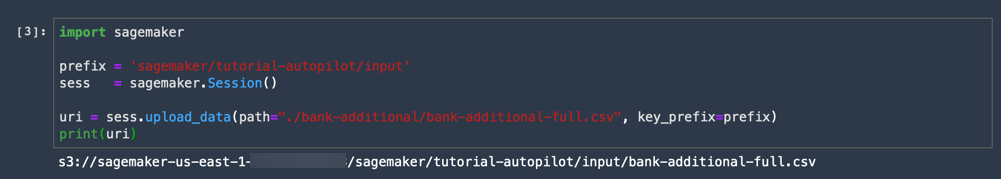

In [ ]:
import sagemaker

prefix = 'sagemaker/tutorial-autopilot/input'
sess   = sagemaker.Session()

uri = sess.upload_data(path="./bank-additional/bank-additional-full.csv", key_prefix=prefix)
print(uri)


done! The code output displays the S3 bucket URI like the following example:

In [ ]:
s3://sagemaker-us-east-2-ACCOUNT_NUMBER/sagemaker/tutorial-autopilot/input/bank-additional-full.csv

## **Step 4. Create a SageMaker Autopilot experiment**

Now that I have downloaded and staged my dataset in Amazon S3, I can create an Amazon SageMaker Autopilot experiment. An experiment is a collection of processing and training jobs related to the same machine learning project.
I Complete the following steps to create a new experiment.

a. In the left navigation pane of Amazon SageMaker Studio, choose Experiments (icon symbolized by a flask), then choose Create Experiment.

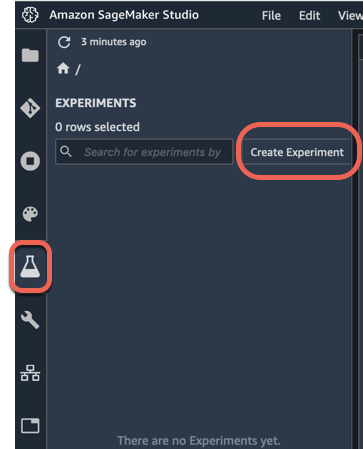

b. Fill the Job Settings fields as follows:

1. Experiment Name: tutorial-autopilot

2. S3 location of input data: S3 URI you printed above
(e.g. s3://sagemaker-us-east-2-123456789012/sagemaker/tutorial-autopilot/input/bank-additional-full.csv)

3. Target attribute name: y

4. S3 location for output data: s3://sagemaker-us-east-2-[ACCOUNT-NUMBER]/sagemaker/tutorial-autopilot/output

(make sure to replace [ACCOUNT-NUMBER] with your own account number)

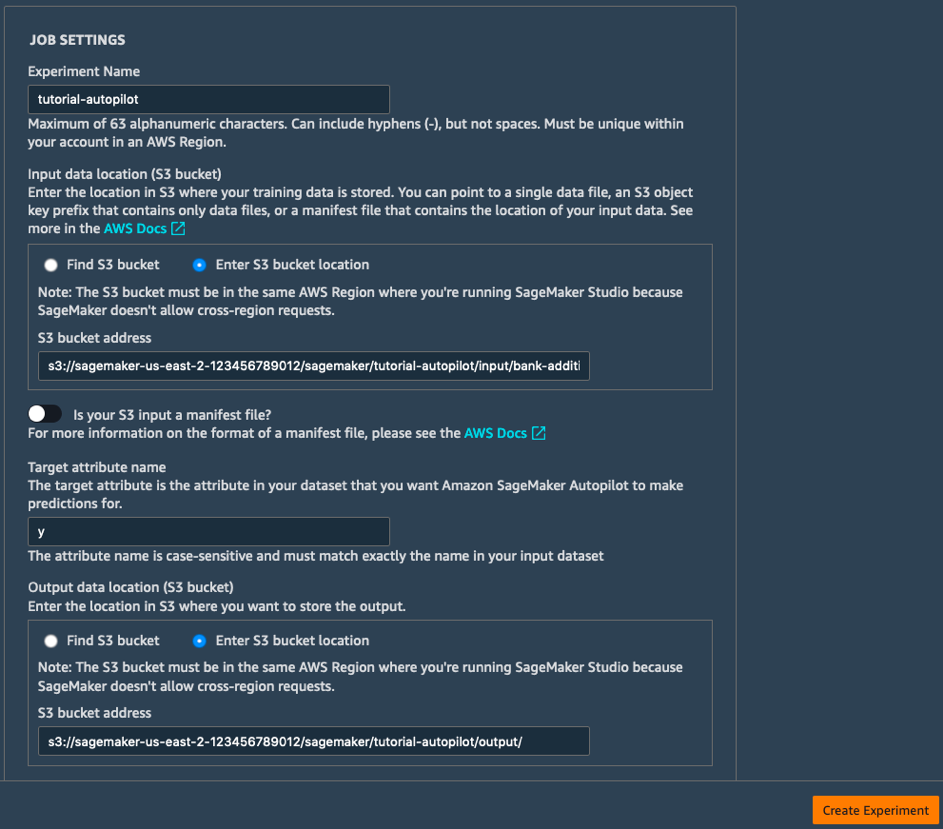

c. Leave all other settings as the defaults and choose Create Experiment.

Success! This starts the Amazon SageMaker Autopilot experiment! The process will generate a model as well as statistics that I can view in real time while the experiment is running. After the experiment is completed, I can view the trials, sort by objective metric, and right-click to deploy the model for use in other environments.

# **Step 5. Explore SageMaker Autopilot experiment stages**

Step 5. Explore SageMaker Autopilot experiment stages
While your experiment is running, you can learn about and explore the different stages of the SageMaker Autopilot experiement.  

This section provides more details on the SageMaker Autopilot experiment stages:

Analyzing Data
Feature Engineering
Model Tuning

## **Analyzing Data**

The Analyzing Data stage identifies the problem type to be solved (linear regression, binary classification, multiclass classification). Then, it comes up with ten candidate pipelines. A pipeline combines a data preprocessing step (handling missing values, engineering new features, etc.), and a model training step using an ML algorithm matching the problem type. Once this step is complete, the job moves on to feature engineering.  

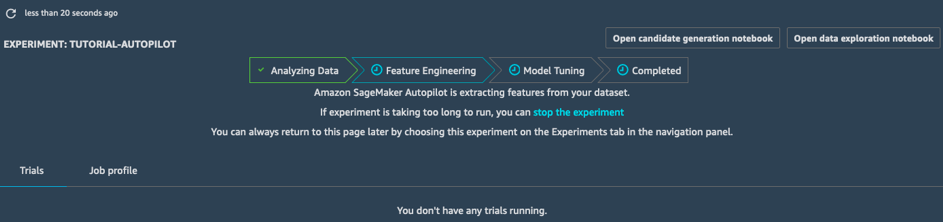

# **Feature Engineering**

In the Feature Engineering stage, the experiment creates training and validation datasets for each candidate pipeline, storing all artifacts in your S3 bucket. While in the Feature Engineering stage, you can open and view two auto-generated notebooks:

The data exploration notebook contains information and statistics on the dataset.
The candidate generation notebook contains the definition of the ten pipelines. In fact, this is a runnable notebook: you can reproduce exactly what the AutoPilot job does, understand how the different models are built, and even keep tweaking them if you want.
With these two notebooks, you can understand in detail how data is preprocessed, and how models are built and optimized. This transparency is an important feature of Amazon SageMaker Autopilot.

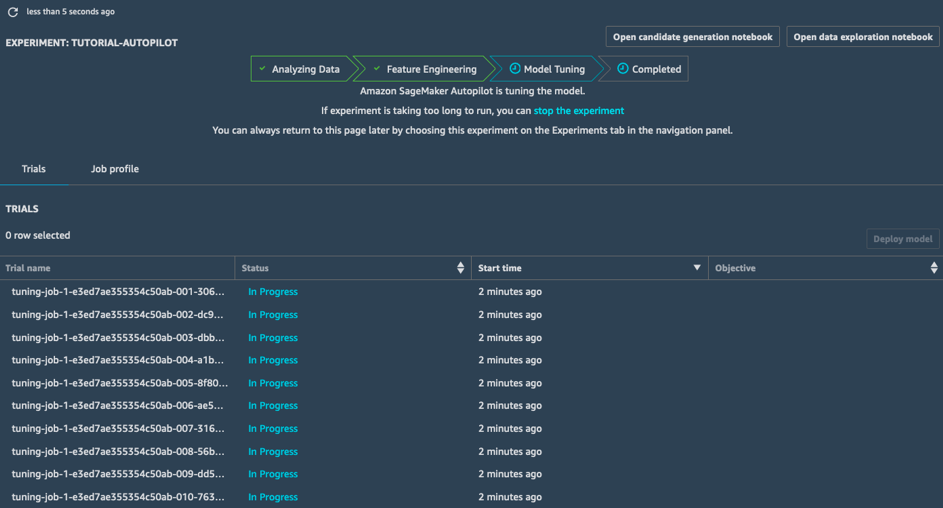

# Step 6. Deploy the best **model**

Now that your experiment has completed, you can choose the best tuning model and deploy the model to an endpoint managed by Amazon SageMaker.

Follow these steps to choose the best tuning job and deploy the model.

a. In the Trials list of your experiment, choose the carrot next to Objective to sort the tuning jobs in descending order. The best tuning job is highlighted with a star.



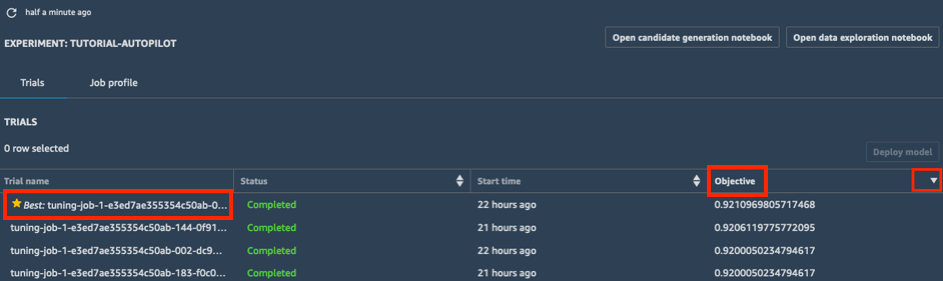

b. Select the best tuning job (indicated by a star) and choose Deploy model.


c. In the Deploy model box, give your endpoint a name (e.g. tutorial-autopilot-best-model) and leave all settings as the defaults. Choose Deploy model.

Your model is deployed to an HTTPS endpoint managed by Amazon SageMaker.

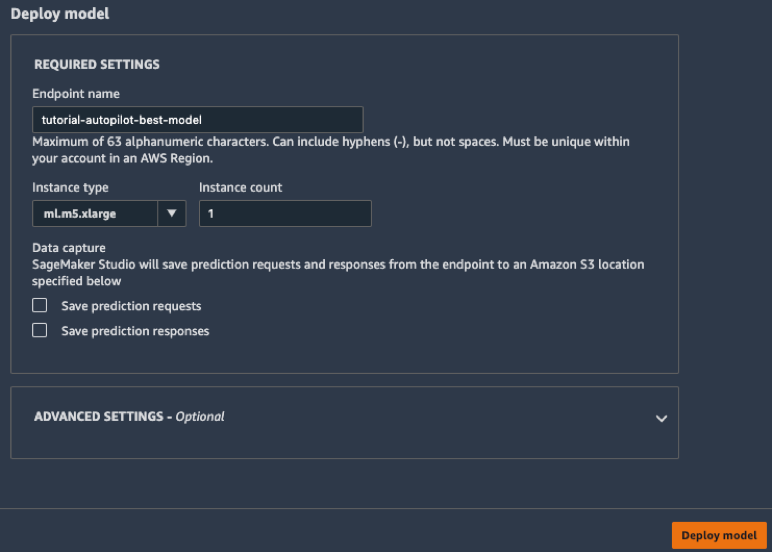

d. In the left toolbar, choose the Endpoints icon. You can see your model being created, which will take a few minutes. Once the endpoint status is InService, you can send data and receive predictions!

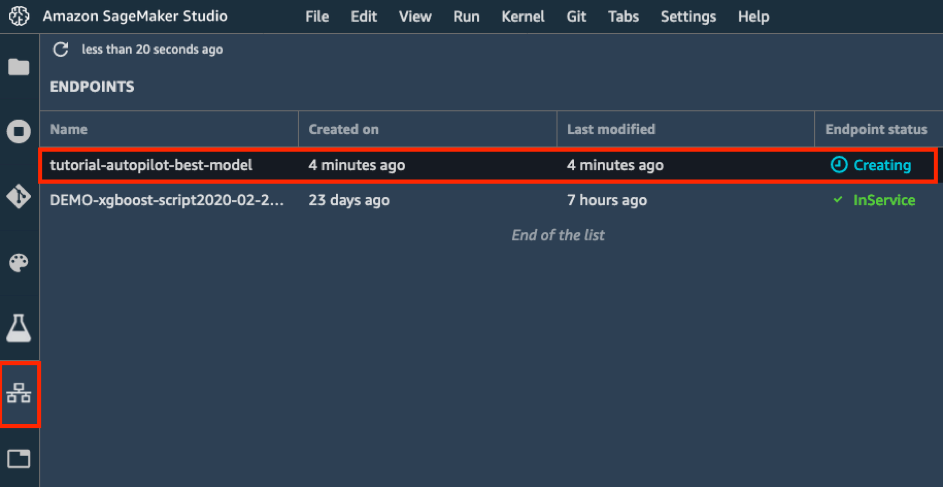

# **Step 7. Predict with your model**

Now that the model is deployed, you can predict the first 2,000 samples of the dataset. For this purpose, you use the invoke_endpoint API in the boto3 SDK. In the process, you compute important machine learning metrics: accuracy, precision, recall, and the F1 score.

Follow these steps to predict with your model.

In my Jupyter notebook, i run the following code:

In [ ]:
import boto3, sys

ep_name = 'tutorial-autopilot-best-model'
sm_rt = boto3.Session().client('runtime.sagemaker')

tn=tp=fn=fp=count=0

with open('bank-additional/bank-additional-full.csv') as f:
    lines = f.readlines()
    for l in lines[1:2000]:   # Skip header
        l = l.split(',')      # Split CSV line into features
        label = l[-1]         # Store 'yes'/'no' label
        l = l[:-1]            # Remove label
        l = ','.join(l)       # Rebuild CSV line without label

        response = sm_rt.invoke_endpoint(EndpointName=ep_name,
                                         ContentType='text/csv',
                                         Accept='text/csv', Body=l)

        response = response['Body'].read().decode("utf-8")
        #print ("label %s response %s" %(label,response))

        if 'yes' in label:
            # Sample is positive
            if 'yes' in response:
                # True positive
                tp=tp+1
            else:
                # False negative
                fn=fn+1
        else:
            # Sample is negative
            if 'no' in response:
                # True negative
                tn=tn+1
            else:
                # False positive
                fp=fp+1
        count = count+1
        if (count % 100 == 0):
            sys.stdout.write(str(count)+' ')

print ("Done")

accuracy  = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall    = tp/(tp+fn)
f1        = (2*precision*recall)/(precision+recall)

print ("%.4f %.4f %.4f %.4f" % (accuracy, precision, recall, f1))


You should see the following output.

In [ ]:
100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 Done
0.9830 0.6538 0.9873 0.7867


This output is a progress indicator showing the number of samples that have been predicted!

# **Step 8. Clean up**

In this step, you terminate the resources you used in this lab.

Important: Terminating resources that are not actively being used reduces costs and is a best practice. Not terminating your resources will result in charges to your account.

Delete your endpoint by running the following code:

In [ ]:
sess.delete_endpoint(endpoint_name=ep_name)

If you want to clean up all training artifacts (models, preprocessed data sets, etc.)

Note: Make sure to replace ACCOUNT_NUMBER with your account number.

In [ ]:
%%sh
aws s3 rm --recursive s3://sagemaker-us-east-2-ACCOUNT_NUMBER/sagemaker/tutorial-autopilot/

# **Congratulations**